In [30]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd                  #data processing e.g. reading files (pd.read_csv)
import numpy as np                   #linear algebra
import matplotlib.pyplot as plt      #plotting and visualization
import seaborn as sns                #visualization
import nltk
from nltk.corpus import stopwords
import requests
import warnings
import re 
from textblob import TextBlob 
from collections import Counter
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from math import * 
import math
from sklearn.cluster import KMeans
import collections
# !pip install mlxtend
from mlxtend.preprocessing import minmax_scaling
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
df = pd.read_csv("yelp_data.csv")
df_2 = pd.read_csv("yelp_data_upstate.csv")

In [3]:
len_lst=[]
for x in df["Review"]:
    len_lst.append(len(x))

In [4]:
df["Len"] = [x for x in len_lst]
df["Date"] = [pd.to_datetime(i) for i in df["Date"]]

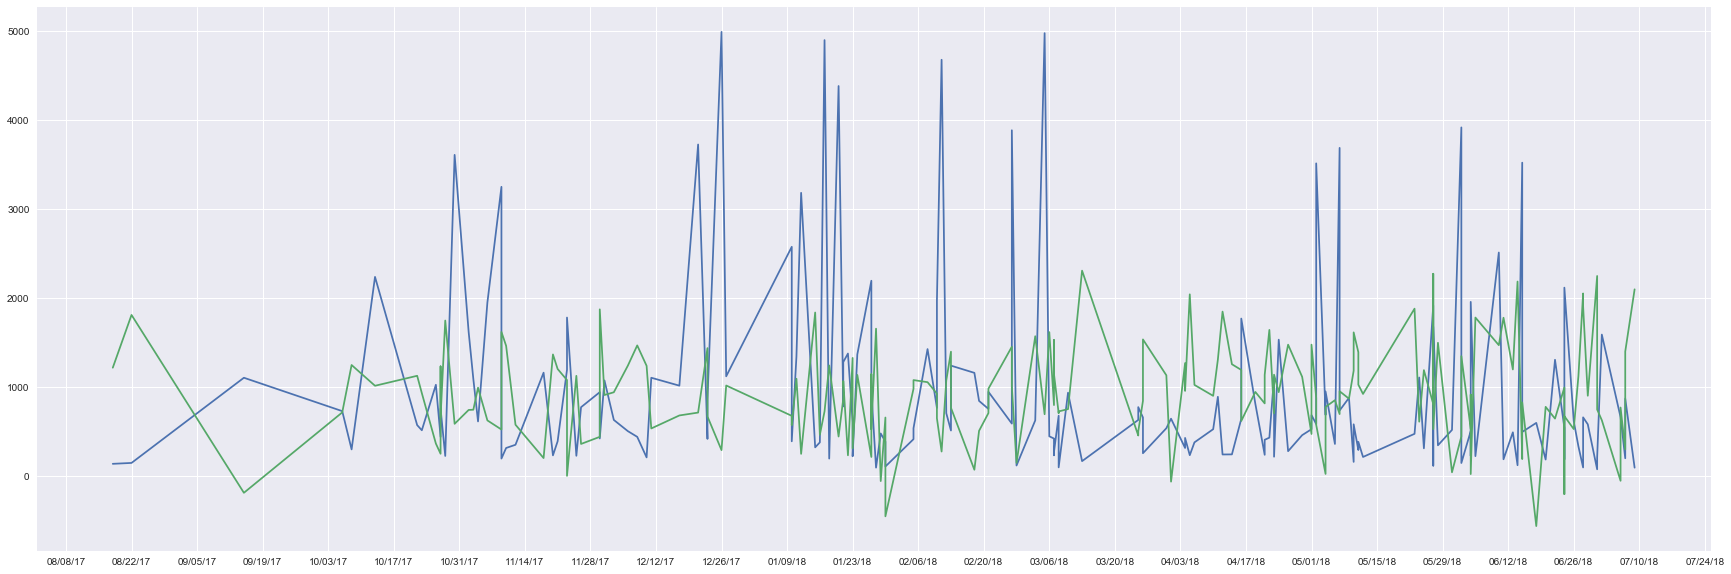

In [5]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df['Date'],df['Len'])
plt.plot(df['Date'],3000*df['Sentiment'])
FMT = DateFormatter("%m/%d") 
ax.xaxis.set_major_formatter(FMT) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator( interval=2))

In [6]:
len_lst_2=[]
for x in df_2["Review"]:
    len_lst_2.append(len(x))
df_2["Len"] = [x for x in len_lst_2]
df_2["Date"] = [pd.to_datetime(i) for i in df_2["Date"]]    

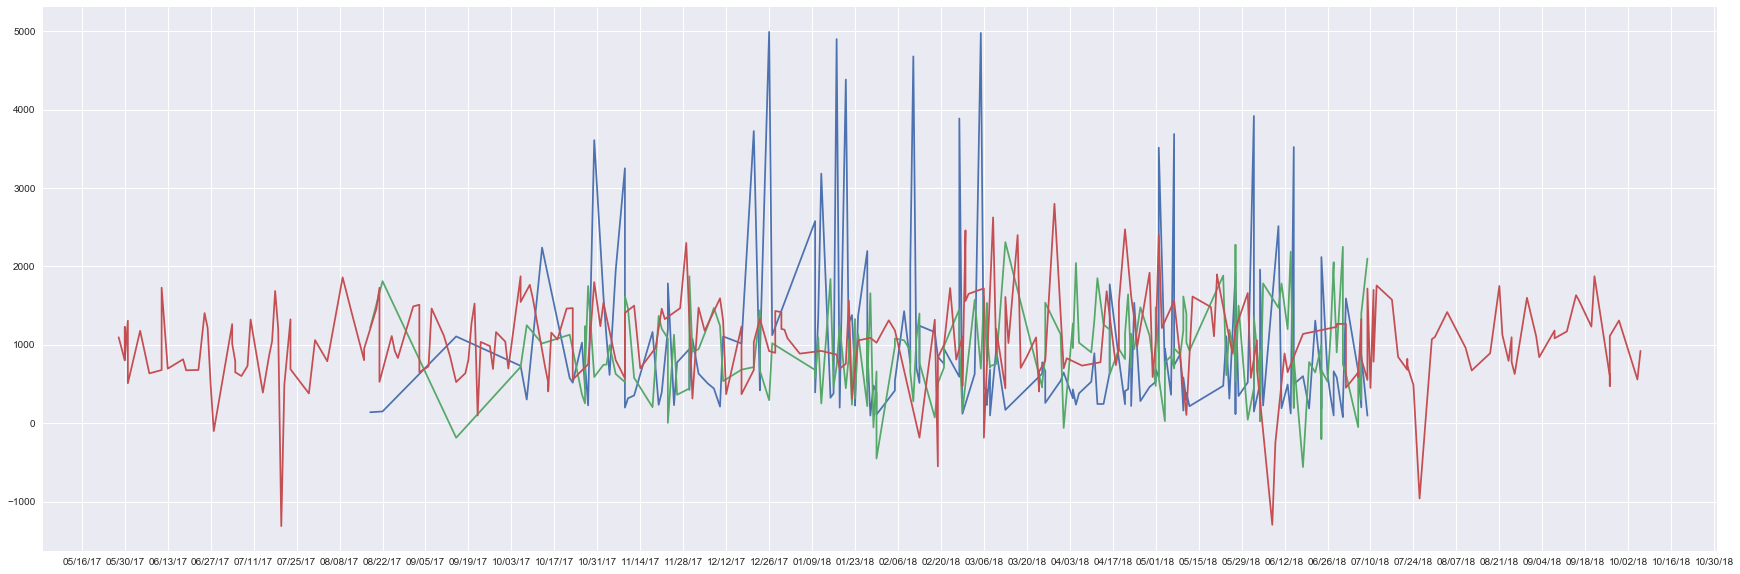

In [7]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df['Date'],df['Len'])
plt.plot(df['Date'],3000*df['Sentiment'])
plt.plot(df_2['Date'],3000*df_2['Sentiment'])
FMT = DateFormatter("%m/%d") 
ax.xaxis.set_major_formatter(FMT) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator( interval=2))

In [8]:
np.corrcoef(df['Rating'],df['Len'])

array([[ 1.        , -0.26963998],
       [-0.26963998,  1.        ]])

In [9]:
np.corrcoef(df['Sentiment'],df['Len'])

array([[ 1.        , -0.35378174],
       [-0.35378174,  1.        ]])

In [10]:
np.corrcoef(df_2['Rating'],df_2['Len'])

array([[ 1.        , -0.03328202],
       [-0.03328202,  1.        ]])

In [11]:
np.corrcoef(df_2['Sentiment'],df_2['Len'])

array([[ 1.        , -0.25937219],
       [-0.25937219,  1.        ]])

In [12]:
np.corrcoef(df['Temp'],df['Len'])

array([[ 1.        , -0.08169305],
       [-0.08169305,  1.        ]])

In [13]:
np.corrcoef(df_2['Temp'],df_2['Len'])

array([[ 1.        , -0.00457115],
       [-0.00457115,  1.        ]])

In [15]:
pearsonr(df['Sentiment'],df['Len'])

(-0.3537817390347262, 2.215729211462582e-06)

In [148]:
dates=[x for x in df["Date"]]
sents=[x for x in df["Sentiment"]]
length=[x for x in df["Len"]]
ratings=[x for x in df["Rating"]]

In [149]:
len_exploration = pd.DataFrame({'Date': dates,'Sents':sents, 'Len': length, 'Ratings':ratings})
len_exploration.head(5)
lt_800=len_exploration[len_exploration["Len"]<1000]
gt_800=len_exploration[len_exploration["Len"]>1000]

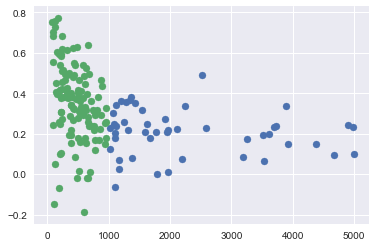

In [150]:
plt.scatter(gt_800["Len"],gt_800["Sents"])
plt.scatter(lt_800["Len"],lt_800["Sents"])

In [151]:
gt_800_len = [[x] for x in gt_800["Len"]]
gt_800_sent = [[x] for x in gt_800["Sents"]]

Coefficient:  [[-1.11451072e-05]]
Intercept:  [0.23267515]


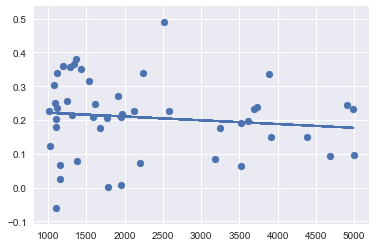

In [152]:
clf = linear_model.LinearRegression()
clf.fit(X=gt_800_len,y=gt_800_sent)
y_pred = clf.predict(gt_800_len)
plt.scatter(gt_800_len,gt_800_sent)
plt.plot(gt_800_len,y_pred)
print("Coefficient: ",clf.coef_)
print("Intercept: ",clf.intercept_)

Coefficient:  [[-0.00027318]]
Intercept:  [0.47832719]


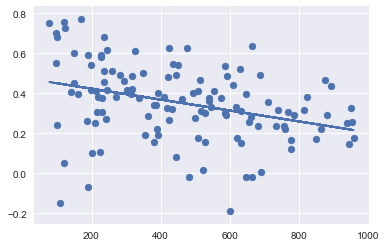

In [153]:
lt_800_len = [[x] for x in lt_800["Len"]]
lt_800_sent = [[x] for x in lt_800["Sents"]]
clf = linear_model.LinearRegression()
clf.fit(X=lt_800_len,y=lt_800_sent)
y_pred = clf.predict(lt_800_len)
plt.scatter(lt_800_len,lt_800_sent)
plt.plot(lt_800_len,y_pred)
print("Coefficient: ",clf.coef_)
print("Intercept: ",clf.intercept_)

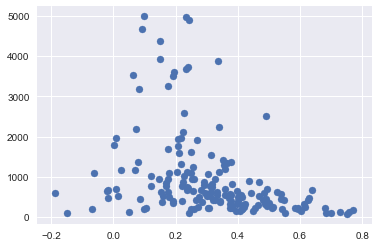

In [154]:
plt.scatter(sents,length)


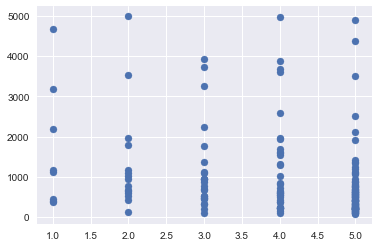

In [155]:
plt.scatter(ratings,length)

Coefficient:  [[-6.11463523e-05]]
Intercept:  [0.37093321]


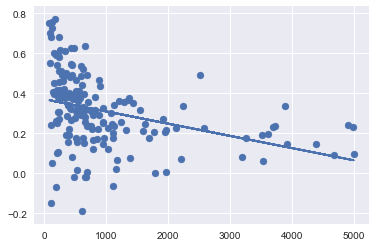

In [156]:
dates=[[x] for x in df["Date"]]
sents=[[x] for x in df["Sentiment"]]
length=[[x] for x in df["Len"]]
ratings=[[x] for x in df["Rating"]]
clf = linear_model.LinearRegression()
clf.fit(X=length,y=sents)
y_pred = clf.predict(length)
plt.scatter(length,sents)
plt.plot(length,y_pred)
print("Coefficient: ",clf.coef_)
print("Intercept: ",clf.intercept_)

# Upstate (2nd Restaurant)

Coefficient:  [[-9.97932027e-05]]
Intercept:  [0.40435028]


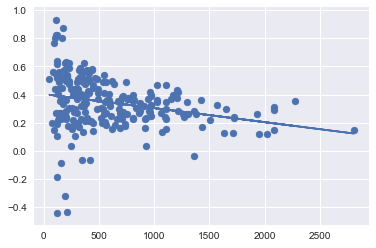

In [157]:
dates=[[x] for x in df_2["Date"]]
sents=[[x] for x in df_2["Sentiment"]]
length=[[x] for x in df_2["Len"]]
ratings=[[x] for x in df_2["Rating"]]
clf = linear_model.LinearRegression()
clf.fit(X=length,y=sents)
y_pred = clf.predict(length)
plt.scatter(length,sents)
plt.plot(length,y_pred)
print("Coefficient: ",clf.coef_)
print("Intercept: ",clf.intercept_)

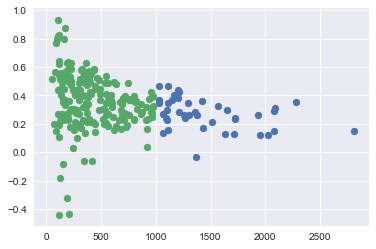

In [158]:
dates=[x for x in df_2["Date"]]
sents=[x for x in df_2["Sentiment"]]
length=[x for x in df_2["Len"]]
ratings=[x for x in df_2["Rating"]]
len_exploration_2 = pd.DataFrame({'Date': dates,'Sents':sents, 'Len': length, 'Ratings':ratings})
len_exploration_2.head(5)
lt_800=len_exploration_2[len_exploration_2["Len"]<1000]
gt_800=len_exploration_2[len_exploration_2["Len"]>1000]
plt.scatter(gt_800["Len"],gt_800["Sents"])
plt.scatter(lt_800["Len"],lt_800["Sents"])

Coefficient:  [[-9.60394436e-05]]
Intercept:  [0.41140091]


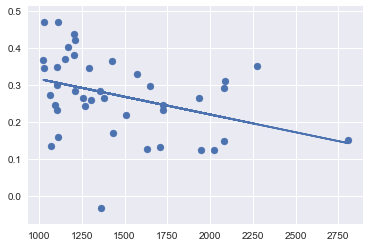

In [159]:
gt_800_len = [[x] for x in gt_800["Len"]]
gt_800_sent = [[x] for x in gt_800["Sents"]]
clf = linear_model.LinearRegression()
clf.fit(X=gt_800_len,y=gt_800_sent)
y_pred = clf.predict(gt_800_len)
plt.scatter(gt_800_len,gt_800_sent)
plt.plot(gt_800_len,y_pred)
print("Coefficient: ",clf.coef_)
print("Intercept: ",clf.intercept_)

Coefficient:  [[-0.0001438]]
Intercept:  [0.42017309]


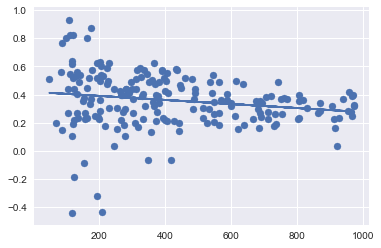

In [160]:
lt_800_len = [[x] for x in lt_800["Len"]]
lt_800_sent = [[x] for x in lt_800["Sents"]]
clf = linear_model.LinearRegression()
clf.fit(X=lt_800_len,y=lt_800_sent)
y_pred = clf.predict(lt_800_len)
plt.scatter(lt_800_len,lt_800_sent)
plt.plot(lt_800_len,y_pred)
print("Coefficient: ",clf.coef_)
print("Intercept: ",clf.intercept_)

# Discussion

From these scatter plots and linear regression models we fit, we could sense a pattern that more lengthy paragraphs tend to have a more negative tone. For example, for both restaurants, the linear regression model we fit have negative coefficient when we are using length of a review as input X to make prediction of its sentiment score. That being said, as the length of a review increases, it is more likely to be critical review.